# Twitter Sentiment Analysis

---

## Problem Statement &#8594; Part 1

---

Understanding the problem statement is of prime importance. This would help us get an intuition of what we might be dealing with. Let us see the problem statement -

The aim of this problem is to detect hate speech in tweets. To simplify, we assume that a tweet contains hate speech if it has a racist or sexist sentiments in it. So, our task is to classify racist or sexist tweets from a mixture of tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist i.e. a hate message and label '0' denotes the tweet is not racist/sexist i.e. not a hate message, your objective is to predict the labels on the test dataset.  

The dataset can be found here:  
https://www.kaggle.com/datasets/dv1453/twitter-sentiment-analysis-analytics-vidya?select=train_E6oV3lV.csv

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> numpy : Library for Numeric Computations in Python  
> pandas : Library for Data Acquisition and Preparation  
> matplotlib : Low-level library for Data Visualization  
> seaborn : Higher-level library for Data Visualization  
> re : for applying regular expressions  
> nltk : for Natural Language Processing  
> string : for string manipulation  
> warnings : for controlling warnings  

In [6]:
import re

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import string as str

import nltk

import warnings as warn
warn.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd 
pd.set_option("display.max_colwidth", 200)

%matplotlib inline

### Reading datasets

---

Let us read the train and test data sets using pandas.

In [3]:
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

---

Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [9]:
print("Data type : ", type(train))
print("Data dims (train): ", train.shape)
print("Data dims (test): ", test.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims (train):  (31962, 3)
Data dims (test):  (17197, 2)


> Train set has 31,962 tweets and test set has 17,197 tweets with 3 and 2 columns respectively.

Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [14]:
print("Train:")
train.dtypes

Train:


id        int64
label     int64
tweet    object
dtype: object

In [12]:
print("Test:")
test.dtypes

Test:


id        int64
tweet    object
dtype: object

## Data Preparation and Cleaning

---

### Data Inspection

---

We shall inspect expamples of non-hate messages.

In [15]:
train[train['label'] == 0].head(15)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


---

We shall inspect expamples of hate messages.

In [16]:
train[train['label'] == 1].head(15)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


Let us see the label-distribution in the training dataset.

In [18]:
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

> An interesting distribution indeed! We have **29720 (92.985...%)** positive tweets while on the other hand we have **2242 (7.014...%)** hate tweets. So it is a highly imbalanced distribution.

### Changes in the distribution of length

---

We need to check if the distribution of the length of tweets of test data is similar to that of the train data. This is because we do not want our model to be a bad classifier due to not taking care of managing this conrol variable.

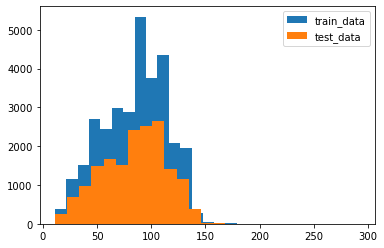

In [19]:
train_len = train['tweet'].str.len()
test_len = test['tweet'].str.len()

plt.hist(train_len, bins=25, label="train_data")
plt.hist(test_len, bins=25, label="test_data")
plt.legend()
plt.show()

> The overall shape of the two distributions are roughly similar. This means we have a well-distributed train-test split.

### Data Cleaning